# BibRec: Re-Training Random Forest Model

### Features: Country, State, Age, Year-of-Publication, Publisher

In [25]:
from bibrec.server.data_exploration import get_normalized_data, hot_encode_country
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv', users_path='data/BX-Users.csv', ratings_path='data/BX-Book-Ratings.csv')


/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/wt-rf/bibrec/server/data_exploration.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.90429972897351


/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/wt-rf/bibrec/server/data_exploration.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [26]:
# limit data volume
df_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = ratings[1000:2000]
df_ratings = df_ratings.reset_index()


In [27]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
tmp_users = users.filter(regex="user_id|age|country_|state_", axis=1)
tmp_books = books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df = df_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df = df.merge(tmp_users)
df = df.merge(tmp_books)

In [28]:
df_ratings

,index,user_id,isbn,book_rating,isbn13,age,city,state,country,user_mean,user_count,normalized_rating
0,1000,277784,0440802911,8,978044080297,17.000000,baton rouge,louisiana,usa,8.0,1.0,0.0
1,1001,277788,0440407524,8,9780440407522,17.000000,baton rouge,louisiana,usa,8.0,1.0,0.0
2,1002,277794,0440967694,8,9780440967699,25.392843,edmonton,alberta,canada,8.0,1.0,0.0
3,1003,277795,0064406601,5,9780064406604,17.000000,zachary,louisiana,usa,5.0,1.0,0.0
4,1004,277797,0440228441,8,9780440228448,17.000000,baton rouge,louisiana,usa,8.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995,278663,0451182014,3,9780451182012,60.373656,arlington,texas,usa,5.8,5.0,-2.8
996,1996,278668,8408022938,5,9788408022930,48.000000,madrid,madrid,spain,5.0,5.0,0.0
997,1997,278668,8408044079,5,9788408044079,48.000000,madrid,madrid,spain,5.0,5.0,0.0
998,1998,278668,8423322912,5,9788423322916,48.000000,madrid,madrid,spain,5.0,5.0,0.0


In [29]:
# Features
X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']


In [30]:
X

,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,country_portugal,...,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,publisher_berkley_publishing_group,publisher_warner_books,publisher_other
0,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25.392843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,60.373656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1011,48.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1012,48.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1013,48.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
Y

0       8
1       8
2       8
3       5
4       8
       ..
1010    3
1011    5
1012    5
1013    5
1014    5
Name: book_rating, Length: 1015, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [33]:
import pickle

# Load the model from the file
with open("random_forest_classifier5.pkl", "rb") as file:
    rfc = pickle.load(file)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [35]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        16
           5       0.39      0.36      0.37        39
           6       0.09      0.07      0.08        30
           7       0.23      0.25      0.24        65
           8       0.28      0.36      0.31        69
           9       0.25      0.25      0.25        44
          10       0.18      0.18      0.18        33

    accuracy                           0.24       305
   macro avg       0.14      0.15      0.14       305
weighted avg       0.23      0.24      0.23       305

24.262295081967213


/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
rfc_pred

array([ 5,  8,  5, 10,  8,  2,  7,  7,  8,  8,  9,  5, 10,  8,  8,  6,  8,
        7,  9,  8,  8,  7,  8,  5,  8,  8,  9,  7,  8,  9,  8,  5,  7, 10,
        9,  8,  7, 10,  9,  7,  7,  8,  7,  8,  5,  8,  5,  7,  8,  8,  7,
        8,  8,  7,  8,  7,  9,  5,  8,  3,  7,  9,  7,  6,  7,  8,  7,  8,
        6,  5,  8,  9,  9,  9,  9,  7, 10,  6,  8,  5,  7,  8,  7,  9,  9,
        7,  8,  8,  5,  8, 10,  6, 10, 10,  8,  8,  7,  7,  9,  5,  7,  4,
        7,  8, 10,  7,  6,  8,  7, 10,  9,  5,  5,  5,  8,  8,  7,  5,  7,
        8,  8,  8,  9,  9,  7,  7,  7,  9,  5,  8,  7, 10,  6,  7,  5,  6,
        7,  8,  5, 10,  8,  8,  8,  5,  8,  7,  4,  7,  6,  7,  2,  8,  8,
        8, 10,  5,  7, 10,  8,  9,  7, 10,  6,  8,  5,  5,  7, 10,  6,  9,
        5,  7,  7,  7,  9,  7,  6,  8,  2,  6,  6,  8,  6, 10,  5,  8, 10,
       10,  9,  8,  5,  5,  9,  9,  8,  5,  8,  7,  5,  5,  5, 10,  7,  9,
        8,  8,  8,  7,  8,  7,  8,  7,  8, 10,  8,  9,  8, 10,  9,  8, 10,
        7, 10,  8,  9,  8

/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        16
           5       0.39      0.36      0.37        39
           6       0.09      0.07      0.08        30
           7       0.23      0.25      0.24        65
           8       0.28      0.36      0.31        69
           9       0.25      0.25      0.25        44
          10       0.18      0.18      0.18        33

    accuracy                           0.24       305
   macro avg       0.14      0.15      0.14       305
weighted avg       0.23      0.24      0.23       305

24.262295081967213
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  1  1  1  2  0  2  0]
 [ 0  0  0  0  4  0  7  2  3  0]
 [ 0  1  0  0 14  2  7  8  4  3]
 [ 0  0  0  0  1 

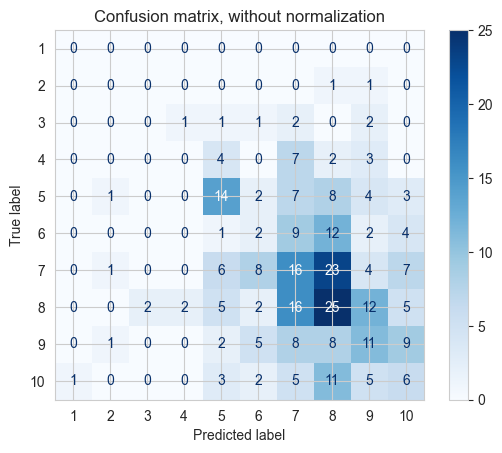

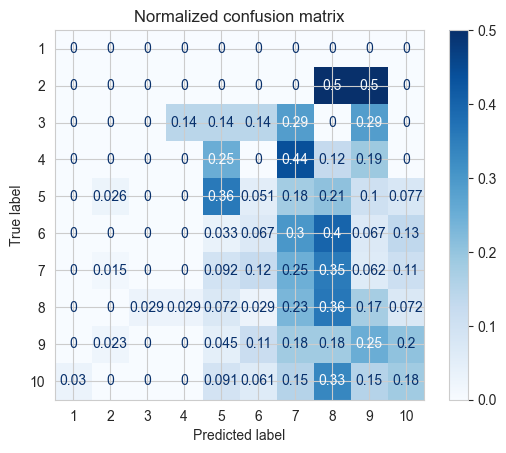

In [37]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [38]:
rfc.score(X_train, y_train)

0.7619718309859155

In [40]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
0,age,0.600935
23,normalized_year_of_publication,0.399065
26,publisher_pocket,0.000000
20,state_illinois,0.000000
21,state_washington,0.000000
22,state_other,0.000000
24,publisher_harlequin,0.000000
25,publisher_silhouette,0.000000
27,publisher_ballantine_books,0.000000
18,state_florida,0.000000


In [ ]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()